In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [2]:
df = pd.read_csv('df.csv')
res = pd.read_csv('res.csv')

df['Total'] = df['Total'] / 1000
df['Dosage'] = df['Dosage'] / 1000
df['Mem tot'] = df['Mem tot'] / 1000
df['Mem ant'] = df['Mem ant'] / 1000
df['Mem post'] = df['Mem post'] / 1000
df['Cyt'] = df['Cyt'] / 1000

df_uni = df[df.Condition == 'Uni']
df_pol = df[df.Condition == 'Pol']
order = ['WT', 'AxA', 'R163A', 'R183-5A', 'C56S']

### Images

In [3]:
def func(ax, path, c):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI_fit.txt')
    rotated = rotated_embryo(img, roi, 250, 200, 3)
    ax.imshow(rotated, cmap='gray', vmin=0, vmax=25000)
    ax.axis('off')
#     ax.axhline(100, c=c, linestyle='--')
#     ax.fill_between([0, 249], [90, 90], [110, 110], color=c, alpha=0.2)

In [4]:
fig, ax = plt.subplots(1, 5)

func(ax[0], df_pol[df_pol.Genotype == 'WT'].Path.iloc[0], 'tab:blue')
func(ax[2], df_pol[df_pol.Genotype == 'R163A'].Path.iloc[0], 'tab:orange')
func(ax[3], df_pol[df_pol.Genotype == 'R183-5A'].Path.iloc[0], 'tab:green')
func(ax[1], df_pol[df_pol.Genotype == 'AxA'].Path.iloc[1], 'tab:red')
func(ax[4], df_pol[df_pol.Genotype == 'C56S'].Path.iloc[0], 'tab:purple')

fig.set_size_inches(9, 2)
fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
fig.savefig('FigsB/imgs_pol.png', dpi=600, transparent=True)

In [5]:
fig, ax = plt.subplots(1, 5)

func(ax[0], df_uni[df_uni.Genotype == 'WT'].Path.iloc[0], 'tab:blue')
func(ax[2], df_uni[df_uni.Genotype == 'R163A'].Path.iloc[0], 'tab:orange')
func(ax[3], df_uni[df_uni.Genotype == 'R183-5A'].Path.iloc[0], 'tab:green')
func(ax[1], df_uni[df_uni.Genotype == 'AxA'].Path.iloc[1], 'tab:red')
func(ax[4], df_uni[df_uni.Genotype == 'C56S'].Path.iloc[0], 'tab:purple')

fig.set_size_inches(9, 2)
fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
fig.savefig('FigsB/imgs_uni.png', dpi=600, transparent=True)

### Ratio: polarised, post

In [6]:
# fig, ax = plt.subplots()
# sns.stripplot(data=df_pol, x='Genotype', y='Ratio post', ax=ax, order=order, linewidth=1)
# # sns.barplot(data=df_pol, x='Genotype', y='Ratio post', ax=ax, alpha=0.2, errwidth=0, order=order)
# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)
#     tick.set_horizontalalignment('right')
# ax.tick_params(axis='both', labelsize=8)
# ax.set_xlabel('')
# ax.set_ylim(-1, 25)
# ax.set_ylabel('Posterior M:C ratio (μm)', fontsize=9)
# fig.set_size_inches(2, 3)
# fig.tight_layout()
# fig.savefig('FigsB/ratio_pol_post.png', dpi=600, transparent=True)

### Ratio: polarised, ant

In [7]:
# fig, ax = plt.subplots()
# sns.stripplot(data=df_pol, x='Genotype', y='Ratio ant', ax=ax, order=order, linewidth=1)
# # sns.barplot(data=df_pol, x='Genotype', y='Ratio ant', ax=ax, alpha=0.2, errwidth=0, order=order)
# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)
#     tick.set_horizontalalignment('right')
# ax.tick_params(axis='both', labelsize=8)
# ax.set_xlabel('')
# ax.set_ylim(-1, 25)
# ax.set_ylabel('Anterior M:C ratio (μm)', fontsize=9)
# fig.set_size_inches(2, 3)
# fig.tight_layout()
# fig.savefig('FigsB/ratio_pol_ant.png', dpi=600, transparent=True)

### Ratio: posterior, both

In [58]:
# fig, ax = plt.subplots()
# for i, gen in enumerate(order):
#     d = df_pol[df_pol.Genotype == gen]
#     x1, x2 = (i-0.2) * np.ones(len(d['Ratio ant'])), (i+0.2) * np.ones(len(d['Ratio ant']))
#     y1, y2 = d['Ratio ant'], d['Ratio post']
#     ax.scatter(x1, y1, c='tab:blue', edgecolors='k')
#     ax.scatter(x2, y2, c='tab:orange', edgecolors='k')
#     ax.plot([x1, x2], [y1, y2], c='k', zorder=0, linewidth=1)
# ax.axhline(0, c='0.8', linestyle='--', zorder=0)
# ax.set_xticklabels([''] + order)
# ax.tick_params(axis='both', labelsize=8)
# ax.set_xlabel('')
# ax.set_ylim(-1, 25)
# ax.set_ylabel('M:C ratio (μm)', fontsize=9)
# fig.set_size_inches(4, 2)
# fig.tight_layout()

<IPython.core.display.Javascript object>


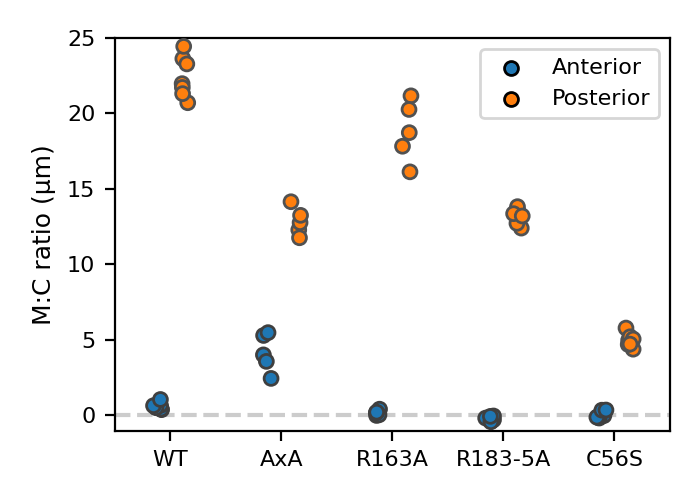

In [54]:
import matplotlib.transforms as transforms

fig, ax = plt.subplots()
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

ax.scatter(x=[], y=[], linewidth=1, edgecolors='k', color='tab:blue', label='Anterior', s=25)
ax.scatter(x=[], y=[], linewidth=1, edgecolors='k', color='tab:orange', label='Posterior', s=25)

sns.stripplot(data=df_pol, x='Genotype', y='Ratio ant', ax=ax, order=order, linewidth=1, color='tab:blue', 
              transform=trans+offset(-5), jitter=0.05)
sns.stripplot(data=df_pol, x='Genotype', y='Ratio post', ax=ax, order=order, linewidth=1, color='tab:orange', 
              transform=trans+offset(5), jitter=0.05)

ax.legend(fontsize=8)
ax.axhline(0, c='0.8', linestyle='--', zorder=0)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylim(-1, 25)
ax.set_ylabel('M:C ratio (μm)', fontsize=9)
fig.set_size_inches(3.5, 2.5)
fig.tight_layout()
fig.savefig('FigsB/ratio_pol_all_data.png', dpi=600, transparent=True)

### Ratio: uniform, total

In [10]:
# fig, ax = plt.subplots()
# sns.stripplot(data=df_uni, x='Genotype', y='Ratio tot', ax=ax, order=order, linewidth=1)
# # sns.barplot(data=df_uni, x='Genotype', y='Ratio tot', ax=ax, alpha=0.2, errwidth=0, order=order)
# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)
#     tick.set_horizontalalignment('right')
# ax.tick_params(axis='both', labelsize=8)
# ax.set_xlabel('')
# ax.set_ylim(-1, 25)
# ax.set_ylabel('M:C ratio (μm)', fontsize=9)
# fig.set_size_inches(2, 3)
# fig.tight_layout()
# fig.savefig('FigsB/ratio_uni_tot.png', dpi=600, transparent=True)

### Ratio: uniform, post

In [11]:
# fig, ax = plt.subplots()
# sns.stripplot(data=df_uni, x='Genotype', y='Ratio post', ax=ax, order=order, linewidth=1)
# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)
#     tick.set_horizontalalignment('right')
# ax.tick_params(axis='both', labelsize=8)
# ax.set_xlabel('')
# ax.set_ylim(-1, 25)
# ax.set_ylabel('Posterior M:C ratio (μm)', fontsize=9)
# fig.set_size_inches(2, 3)
# fig.tight_layout()
# fig.savefig('FigsB/ratio_uni_post.png', dpi=600, transparent=True)

### Ratio: uniform, ant

In [12]:
# fig, ax = plt.subplots()
# sns.stripplot(data=df_uni, x='Genotype', y='Ratio ant', ax=ax, order=order, linewidth=1)
# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)
#     tick.set_horizontalalignment('right')
# ax.tick_params(axis='both', labelsize=8)
# ax.set_xlabel('')
# ax.set_ylim(-1, 25)
# ax.set_ylabel('Anterior M:C ratio (μm)', fontsize=9)
# fig.set_size_inches(2, 3)
# fig.tight_layout()
# fig.savefig('FigsB/ratio_uni_ant.png', dpi=600, transparent=True)

### Ratio: uniform, both

<IPython.core.display.Javascript object>


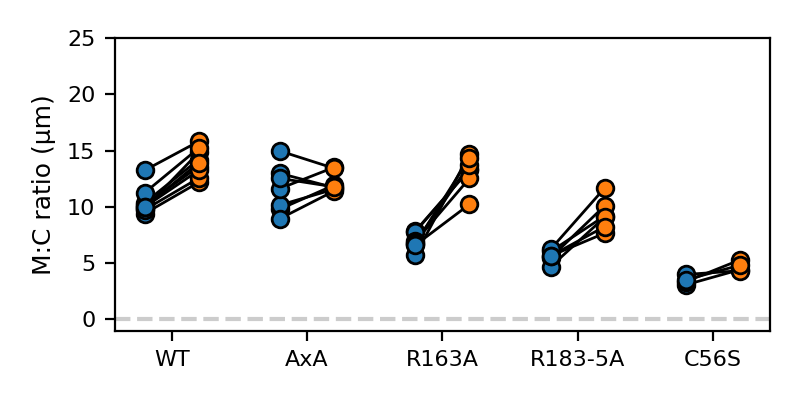

/Users/blandt/anaconda3/anaconda3/envs/membranequant/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


In [13]:
# fig, ax = plt.subplots()
# for i, gen in enumerate(order):
#     d = df_uni[df_uni.Genotype == gen]
#     x1, x2 = (i-0.2) * np.ones(len(d['Ratio ant'])), (i+0.2) * np.ones(len(d['Ratio ant']))
#     y1, y2 = d['Ratio ant'], d['Ratio post']
#     ax.scatter(x1, y1, c='tab:blue', edgecolors='k')
#     ax.scatter(x2, y2, c='tab:orange', edgecolors='k')
#     ax.plot([x1, x2], [y1, y2], c='k', zorder=0, linewidth=1)
# ax.axhline(0, c='0.8', linestyle='--', zorder=0)
# ax.set_xticklabels([''] + order)
# ax.tick_params(axis='both', labelsize=8)
# ax.set_xlabel('')
# ax.set_ylim(-1, 25)
# ax.set_ylabel('M:C ratio (μm)', fontsize=9)
# fig.set_size_inches(4, 2)
# fig.tight_layout()

<IPython.core.display.Javascript object>


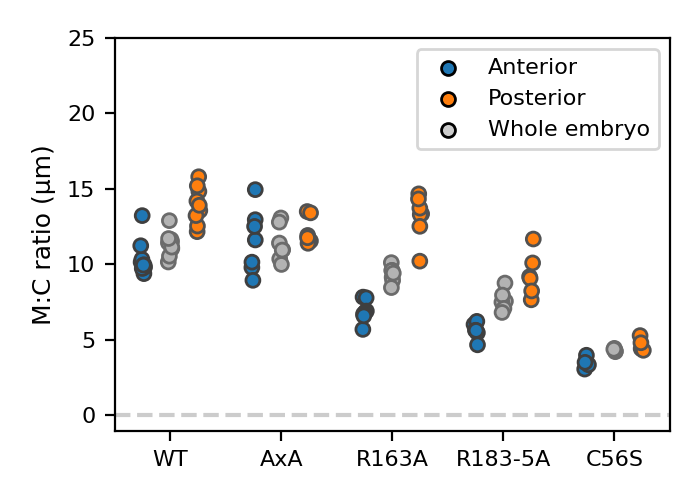

In [57]:
import matplotlib.transforms as transforms

fig, ax = plt.subplots()
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

ax.scatter(x=[], y=[], linewidth=1, edgecolors='k', color='tab:blue', label='Anterior', s=25)
ax.scatter(x=[], y=[], linewidth=1, edgecolors='k', color='tab:orange', label='Posterior', s=25)
ax.scatter(x=[], y=[], linewidth=1, edgecolors='k', color='0.8', label='Whole embryo', s=25)

sns.stripplot(data=df_uni, x='Genotype', y='Ratio ant', ax=ax, order=order, linewidth=1, color='tab:blue', 
              transform=trans+offset(-10), jitter=0.02)
sns.stripplot(data=df_uni, x='Genotype', y='Ratio post', ax=ax, order=order, linewidth=1, color='tab:orange', 
              transform=trans+offset(10), jitter=0.02)
sns.stripplot(data=df_uni, x='Genotype', y='Ratio tot', ax=ax, order=order, linewidth=1, color='0.7', 
              transform=trans+offset(0), jitter=0.02)
ax.legend(fontsize=8)
ax.axhline(0, c='0.8', linestyle='--', zorder=0)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylim(-1, 25)
ax.set_ylabel('M:C ratio (μm)', fontsize=9)
fig.set_size_inches(3.5, 2.5)
fig.tight_layout()
fig.savefig('FigsB/ratio_uni_all_data.png', dpi=600, transparent=True)

### Membrane concentrations: polarised

<IPython.core.display.Javascript object>


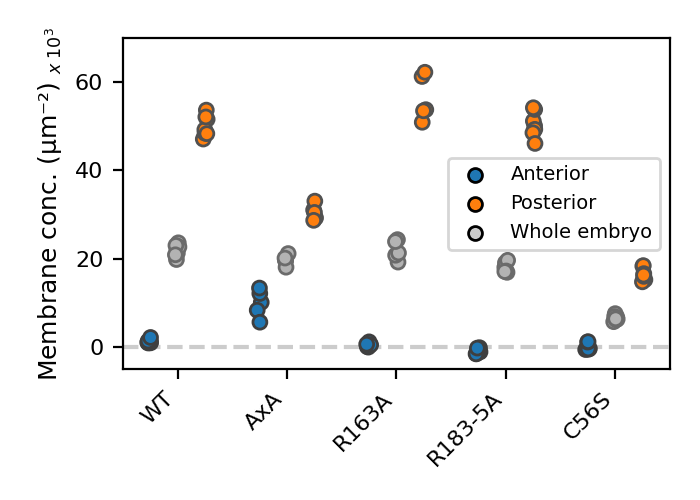

In [80]:
import matplotlib.transforms as transforms

fig, ax = plt.subplots()
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

ax.scatter(x=[], y=[], linewidth=1, edgecolors='k', color='tab:blue', label='Anterior', s=25)
ax.scatter(x=[], y=[], linewidth=1, edgecolors='k', color='tab:orange', label='Posterior', s=25)
ax.scatter(x=[], y=[], linewidth=1, edgecolors='k', color='0.8', label='Whole embryo', s=25)

sns.stripplot(data=df_pol, x='Genotype', y='Mem ant', ax=ax, order=order, linewidth=1, color='tab:blue', 
              transform=trans+offset(-10), jitter=0.02)
sns.stripplot(data=df_pol, x='Genotype', y='Mem post', ax=ax, order=order, linewidth=1, color='tab:orange', 
              transform=trans+offset(10), jitter=0.02)
sns.stripplot(data=df_pol, x='Genotype', y='Mem tot', ax=ax, order=order, linewidth=1, color='0.7', 
              transform=trans+offset(0), jitter=0.02)

ax.legend(fontsize=7)
ax.axhline(0, c='0.8', linestyle='--', zorder=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylim(-5, 70)
ax.set_ylabel('Membrane conc. (μm⁻²) ' + r'$_{x\;10^{3}}$', fontsize=9)
fig.set_size_inches(3.5, 2.5)
fig.tight_layout()
fig.savefig('FigsB/mem_pol_all_data.png', dpi=600, transparent=True)

### Membrane concentrations uniform

<IPython.core.display.Javascript object>


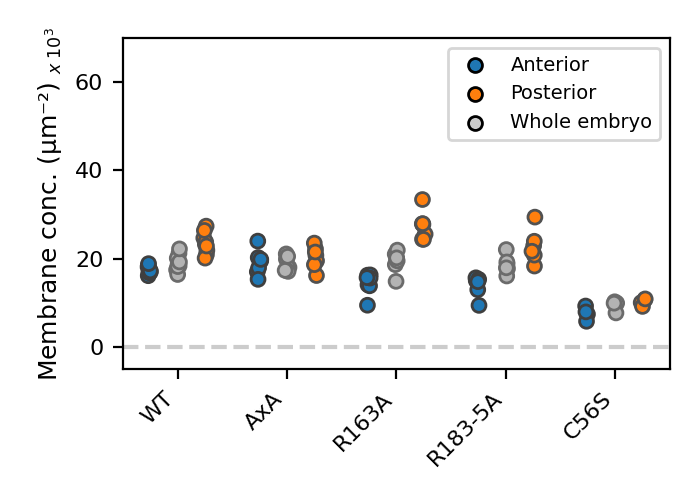

In [79]:
import matplotlib.transforms as transforms

fig, ax = plt.subplots()
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

ax.scatter(x=[], y=[], linewidth=1, edgecolors='k', color='tab:blue', label='Anterior', s=25)
ax.scatter(x=[], y=[], linewidth=1, edgecolors='k', color='tab:orange', label='Posterior', s=25)
ax.scatter(x=[], y=[], linewidth=1, edgecolors='k', color='0.8', label='Whole embryo', s=25)

sns.stripplot(data=df_uni, x='Genotype', y='Mem ant', ax=ax, order=order, linewidth=1, color='tab:blue', 
              transform=trans+offset(-10), jitter=0.02)
sns.stripplot(data=df_uni, x='Genotype', y='Mem post', ax=ax, order=order, linewidth=1, color='tab:orange', 
              transform=trans+offset(10), jitter=0.02)
sns.stripplot(data=df_uni, x='Genotype', y='Mem tot', ax=ax, order=order, linewidth=1, color='0.7', 
              transform=trans+offset(0), jitter=0.02)
ax.legend(fontsize=7)
ax.axhline(0, c='0.8', linestyle='--', zorder=0)
ax.tick_params(axis='both', labelsize=8)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.set_xlabel('')
ax.set_ylim(-5, 70)
ax.set_ylabel('Membrane conc. (μm⁻²) ' + r'$_{x\;10^{3}}$', fontsize=9)
fig.set_size_inches(3.5, 2.5)
fig.tight_layout()
fig.savefig('FigsB/mem_uni_all_data.png', dpi=600, transparent=True)